In [307]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Q1 In the above dataset :   

### a. In case age is less than 18, replace it with mean of age values.

In [308]:
Customer_Acq = pd.read_csv("Customer Acqusition.csv")

In [309]:
df = pd.DataFrame(Customer_Acq)
df.loc[df['Age']<18,'Age'] = df.Age.mean()
df

No Customer   Age        City   Product     Limit Company        Segment
0     1       A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3  34.0      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4  47.0      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5  56.0   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...   ...         ...       ...       ...     ...            ...
95   96      A96  54.0     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100  36.0      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [310]:
Spend_amt = pd.read_csv('spend.csv')

In [311]:
#Merging Spend and Customer Acquistion csv files
df1 = pd.merge(left = Customer_Acq,
               right = Spend_amt,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True)
Cust_limit = 0.50*df1.Limit
df1.loc[df1['Amount']>df1['Limit'],['Amount','Limit']] = Cust_limit
df1

No Customer  Age        City   Product     Limit Company   
0       1       A1   76   BANGALORE      Gold  500000.0      C1  \
1       1       A1   76   BANGALORE      Gold  500000.0      C1   
2       1       A1   76   BANGALORE      Gold  500000.0      C1   
3       1       A1   76   BANGALORE      Gold  500000.0      C1   
4       1       A1   76   BANGALORE      Gold  500000.0      C1   
...   ...      ...  ...         ...       ...       ...     ...   
1495   96      A96   54     CHENNAI    Silver  100000.0     C19   
1496   97      A97   58  TRIVANDRUM  Platimum    5000.0     C20   
1497   98      A98   51    CALCUTTA  Platimum    5000.5     C21   
1498   99      A99   35    CALCUTTA  Platimum    5001.0     C22   
1499  100     A100   36      COCHIN    Silver   50000.0      C5   

            Segment  Sl No:      Month        Type     Amount _merge  
0     Self Employed       1  12-Jan-04   JEWELLERY  485470.80   both  
1     Self Employed       2   3-Jan-04       PETRO  410556.13   both  
2     Self Employed       3  15-Jan-04     CLOTHES   23740.46   both  
3     Self Employed       4  25-Jan-04        FOOD  484342.47   both  
4     Self Employed       5  17-Jan-05      CAMERA  369694.07   both  
...             ...     ...        ...         ...        ...    ...  
1495   Salaried_Pvt      98  25-Jan-04        BIKE   54729.66   both  
1496           Govt      99  12-Jan-04        AUTO    5000.00   both  
1497  Normal Salary     100   3-Jan-04    SHOPPING    5000.50   both  
1498  Self Employed     101  15-Jan-04  AIR TICKET    5001.00   both  
1499   Salaried_MNC     102  25-Jan-04  BUS TICKET   50000.00   both  

[1500 rows x 13 columns]

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [312]:
Repayment = pd.read_csv('Repayment.csv')
Repayment

SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1  12-Jan-04  495414.75         NaN
1        2.0       A1   3-Jan-04  245899.02         NaN
2        3.0       A1  15-Jan-04  259490.06         NaN
3        4.0       A1  25-Jan-04  437555.12         NaN
4        5.0       A1  17-Jan-05  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaN        NaN         NaN
1519     NaN      NaN        NaN        NaN         NaN
1520     NaN      NaN        NaN        NaN         NaN
1521     NaN      NaN        NaN        NaN         NaN
1522     NaN      NaN        NaN        NaN         NaN

[1523 rows x 5 columns]

In [313]:
#Merging Repayment and Customer Acquistion csv files
df2 = pd.merge(left = Customer_Acq,
               right = Repayment,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True)
df2.drop(df2.columns[11],axis=1)

df2.loc[df2['Amount']>df2['Limit'],['Amount','Limit']] = df2.Limit
df2


No Customer  Age        City   Product     Limit Company   
0       1       A1   76   BANGALORE      Gold  500000.0      C1  \
1       1       A1   76   BANGALORE      Gold  500000.0      C1   
2       1       A1   76   BANGALORE      Gold  500000.0      C1   
3       1       A1   76   BANGALORE      Gold  500000.0      C1   
4       1       A1   76   BANGALORE      Gold  500000.0      C1   
...   ...      ...  ...         ...       ...       ...     ...   
1495   96      A96   54     CHENNAI    Silver  100000.0     C19   
1496   97      A97   58  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98   51    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99   35    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100   36      COCHIN    Silver  100000.0      C5   

            Segment  SL No:      Month     Amount  Unnamed: 4 _merge  
0     Self Employed     NaN  12-Jan-04  495414.75         NaN   both  
1     Self Employed     2.0   3-Jan-04  245899.02         NaN   both  
2     Self Employed     3.0  15-Jan-04  259490.06         NaN   both  
3     Self Employed     4.0  25-Jan-04  437555.12         NaN   both  
4     Self Employed     5.0  17-Jan-05  165972.88         NaN   both  
...             ...     ...        ...        ...         ...    ...  
1495   Salaried_Pvt    98.0  25-Jan-04  100000.00         NaN   both  
1496           Govt    99.0  12-Jan-04   10000.00         NaN   both  
1497  Normal Salary   100.0   3-Jan-04   10001.00         NaN   both  
1498  Self Employed   101.0  15-Jan-04   10002.00         NaN   both  
1499   Salaried_MNC   102.0  25-Jan-04   69551.19         NaN   both  

[1500 rows x 13 columns]

## Q2. From the above dataset create the following summaries:


### a. How many distinct customers exist?

In [314]:
Customer_Acq.Customer.nunique()

100

### b. How many distinct categories exist?

In [315]:
print("Product ",df1.Product.nunique())
print("Segment ",df1.Segment.nunique())
print("Type   ",df1.Type.nunique())

Product  3
Segment  5
Type    15


### c. What is the average monthly spend by customers?

In [316]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
avg_month_spend = df1.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_spend))

C:\Users\nagen\AppData\Local\Temp\ipykernel_2820\2778788252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Month'] = pd.to_datetime(df1['Month'])


Amount
Customer month               
A1       1      372762.587143
         2      175235.690000
         4      261649.250000
         5      361141.310000
         8      344372.100000
...                       ...
A95      1      240401.500000
A96      1       54729.660000
A97      1        5000.000000
A98      1        5000.500000
A99      1        5001.000000

[578 rows x 1 columns]

### d. What is the average monthly repayment by customers?

In [317]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2['month'] = df2['Month'].dt.month
avg_month_repay = df2.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_repay))

C:\Users\nagen\AppData\Local\Temp\ipykernel_2820\3786055532.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Month'] = pd.to_datetime(df2['Month'])


Amount
Customer month               
A1       1      343972.327143
         2      156374.760000
         4      254474.580000
         7      297176.740000
         9      186427.500000
...                       ...
A95      1      369405.960000
A96      1      100000.000000
A97      1       10000.000000
A98      1       10001.000000
A99      1       10002.000000

[558 rows x 1 columns]

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [319]:
profit = df2.Amount - df1.Amount
df2['profit'] = profit
profit_mon = df2.groupby(["month"])['profit'].sum()

profit_mon

month
1     3018156.34
2     6019844.45
3     1879245.23
4     4546796.37
5     4055837.08
6      259114.30
7     2033936.92
8      696750.47
9      436487.18
10     395570.00
11     943080.18
12     916456.34
Name: profit, dtype: float64

### f. What are the top 5 product types?

In [320]:
Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
t = (Top_5).reset_index()
display(t)

Type  Sl No:                                           Customer   
0         PETRO  146920  A1A17A21A47A60A90A5A7A8A9A10A11A12A13A14A1A2A3...  \
1        CAMERA  113612  A1A24A35A50A63A78A93A8A9A10A11A12A9A7A8A9A6A8A...   
2          FOOD  110164  A1A19A23A49A62A92A7A5A6A7A8A9A10A11A12A13A14A1...   
3  TRAIN TICKET   90087  A13A32A43A58A86A1A2A3A4A5A6A7A8A3A13A14A1A1A2A...   
4    AIR TICKET  117877  A11A30A41A56A69A70A71A72A73A74A75A76A77A84A99A...   

                                               Month       Amount  
0  3-Jan-0419-Mar-0425-Apr-042-Jun-053-Aug-062-Ap...  49863174.09  
1  17-Jan-0527-Apr-0521-Nov-063-Aug-053-Nov-0625-...  41481571.96  
2  25-Jan-044-Apr-056-Apr-043-Jul-053-Oct-064-Apr...  37773338.43  
3  4-Feb-0612-Aug-0529-May-053-Apr-0629-Mar-0612-...  33067077.15  
4  23-Feb-0510-May-0627-May-053-Feb-0617-Jan-0523...  32955445.42

### g. Which city is having maximum spend?

In [321]:
group_city = df1.groupby(['City'])['Amount'].sum()
group_city.nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

### h. Which age group is spending more money?

In [322]:

group_age = df1.groupby('Age')['Amount'].sum()
max_spend_group = group_age.idxmax()

print("Age group with the highest spending amount:", max_spend_group)


Age group with the highest spending amount: 28


### i. Who are the top 10 customers in terms of repayment?

In [323]:

grouped_customers = df2.groupby('Customer')['Amount'].sum()

sorted_customers = grouped_customers.sort_values(ascending=False)

top_10_customers = sorted_customers.head(10)

print("Top 10 customers in terms of repayment:")
print(top_10_customers)

Top 10 customers in terms of repayment:
Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64


## Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

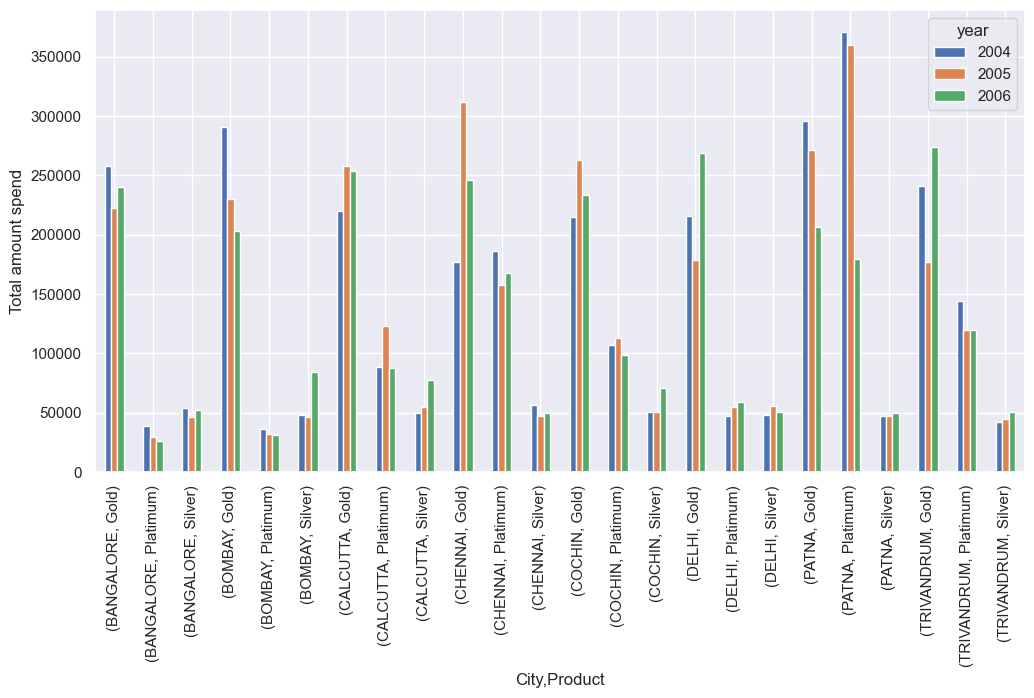

In [324]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['year'] = df1['Month'].dt.year
g = df1.groupby(["City","Product","year"])            
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount


#Graph
sns.set()
pd.pivot_table(df1, index =['City','Product'],columns ='year',values ='Amount').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

## Q4. Create graphs for -

### a. Monthly comparison of total spends, city wise

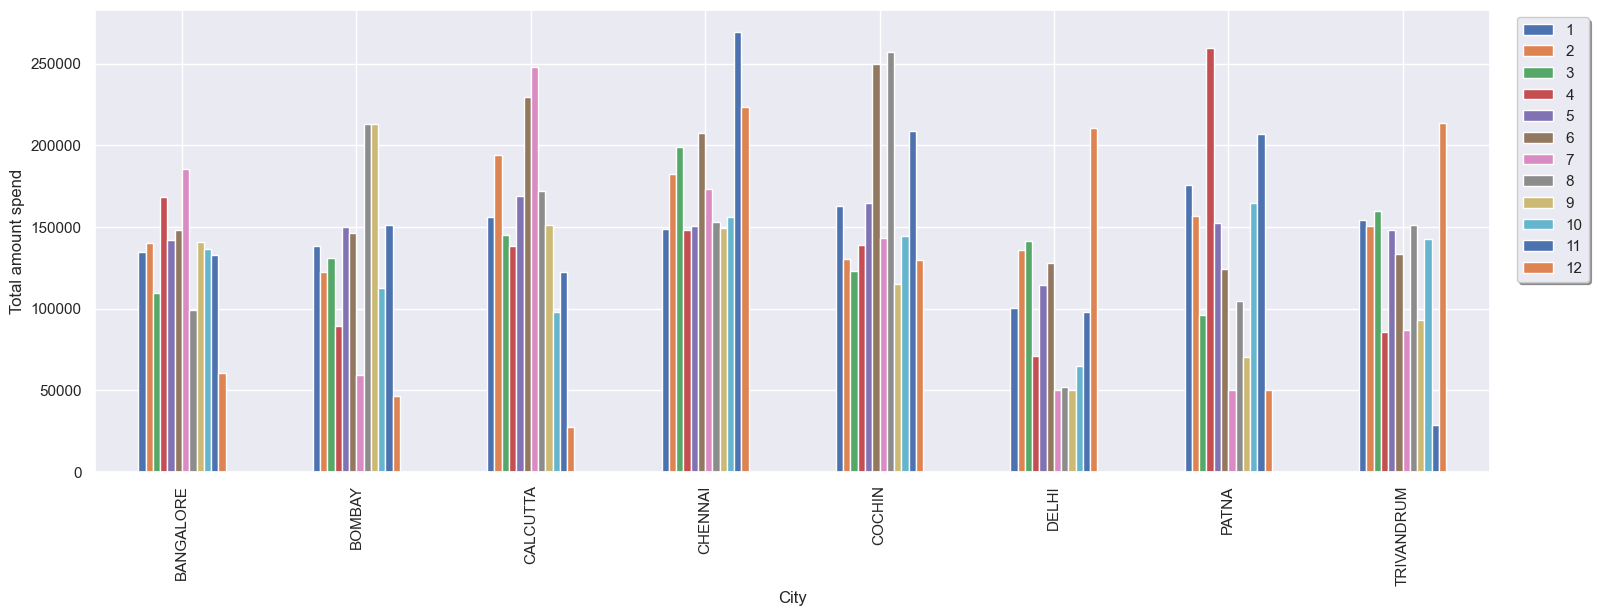

In [325]:
# sns.set()
# pd.pivot_table(df1, index ='Month',columns = 'City',values = 'Amount').plot(kind='bar')
# plt.ylabel("Total amount spend")
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
sns.set()
pd.pivot_table(df1, index ='City',columns ='month',values="Amount").plot(kind='bar',figsize=(18,6))
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.045,1), shadow=True, ncol=1)
plt.ylabel('Total amount spend')
plt.show()

### b. Comparison of yearly spend on air tickets

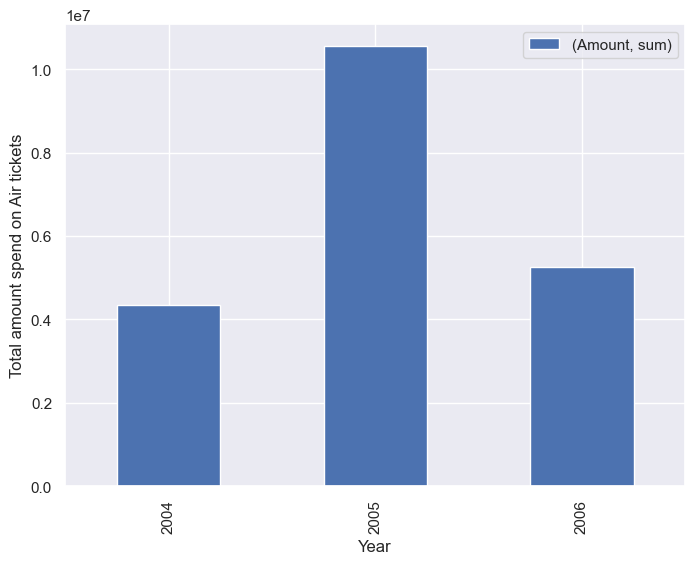

In [326]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['Year'] = df1['Month'].dt.year

s = df1.loc[(df1.Type == 'AIR TICKET')]
spend = s.groupby(['Year']).aggregate({'Amount':['sum']})

spendgraph=spend.plot.bar(figsize=(8,6))
plt.legend()
plt.ylabel('Total amount spend on Air tickets')
plt.show()

### c. Comparison of monthly spend for each product

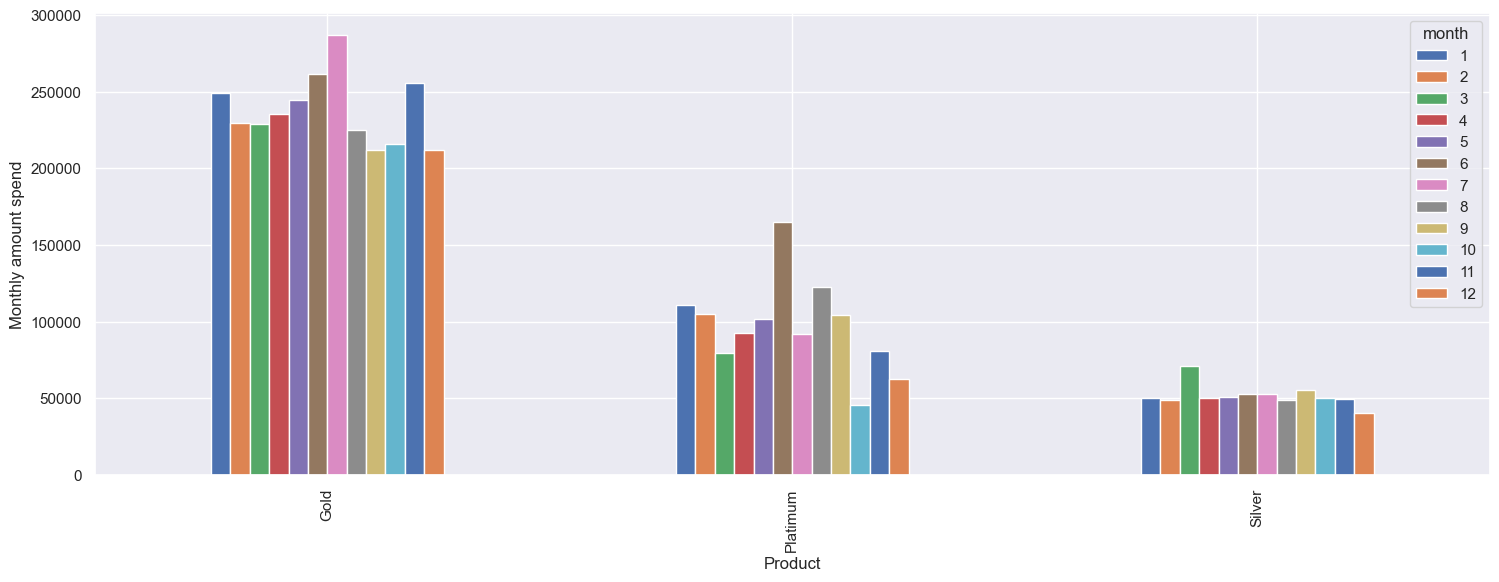

In [328]:
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
g = df1.groupby(["Product","month"])            
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount


#Graph
sns.set()
pd.pivot_table(df1, index ='Product',columns ='month',values ='Amount').plot.bar(figsize=(18,6))
plt.ylabel('Monthly amount spend')
plt.show()

## Q5.Write user defined PYTHON function to perform the following analysis:

In [329]:
def top_customers():
    prod = input("Enter product name : ")
    time = int(input("Enter year  : "))
  
    df2['year'] = df2['Month'].dt.year
    mf1 = df2[df2['year']==time]
    mf2 = df2[df2['Product']==prod]
  

    if not mf2.empty:
        
        print( df2.groupby(['Customer','City']).sum('Amount').sort_values("Amount",ascending = False).head(10))
       
       
    else:
        print("No data available for the given year and product combination.")

    
top_customers()


# sample input product : Gold
# sample input year 2004



Enter product name : Gold
Enter year  : 2004
                       No   Age       Limit   SL No:       Amount  Unnamed: 4   
Customer City                                                                   
A61      COCHIN      2318  1672  19000000.0  45502.0  10539142.91         0.0  \
A60      CALCUTTA    2280  1064  19000000.0  45464.0   9876290.74         0.0   
A13      BANGALORE    403   899  15500000.0  10148.0   9572000.66         0.0   
A43      BANGALORE   1333   651  15500000.0  31424.0   8489871.46         0.0   
A45      COCHIN      1395  2077  15500000.0  31486.0   8448334.87         0.0   
A12      BOMBAY       372  1581  15500000.0  10117.0   8334760.16         0.0   
A14      BANGALORE    434   496  15500000.0  10179.0   7943268.63         0.0   
A44      DELHI       1364   868  15500000.0  31455.0   7744730.12         0.0   
A39      TRIVANDRUM  1209  2418  15500000.0  31300.0   7622483.30         0.0   
A42      BOMBAY      1302  1550  15500000.0  31393.0   7615460.8